In [64]:
#Importing data:

import pandas as pd

data=pd.read_csv('CarPrice_Assignment.csv')

data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [46]:
#Converting string data into numeric values

from sklearn.preprocessing import LabelEncoder
LabelEncoder=LabelEncoder()

data['CarName']=LabelEncoder.fit_transform(data['CarName'])
data['fueltype']=LabelEncoder.fit_transform(data['fueltype'])
data['aspiration']=LabelEncoder.fit_transform(data['aspiration'])
data['doornumber']=LabelEncoder.fit_transform(data['doornumber'])
data['carbody']=LabelEncoder.fit_transform(data['carbody'])
data['drivewheel']=LabelEncoder.fit_transform(data['drivewheel'])
data['enginelocation']=LabelEncoder.fit_transform(data['enginelocation'])
data['enginelocation']=LabelEncoder.fit_transform(data['enginelocation'])

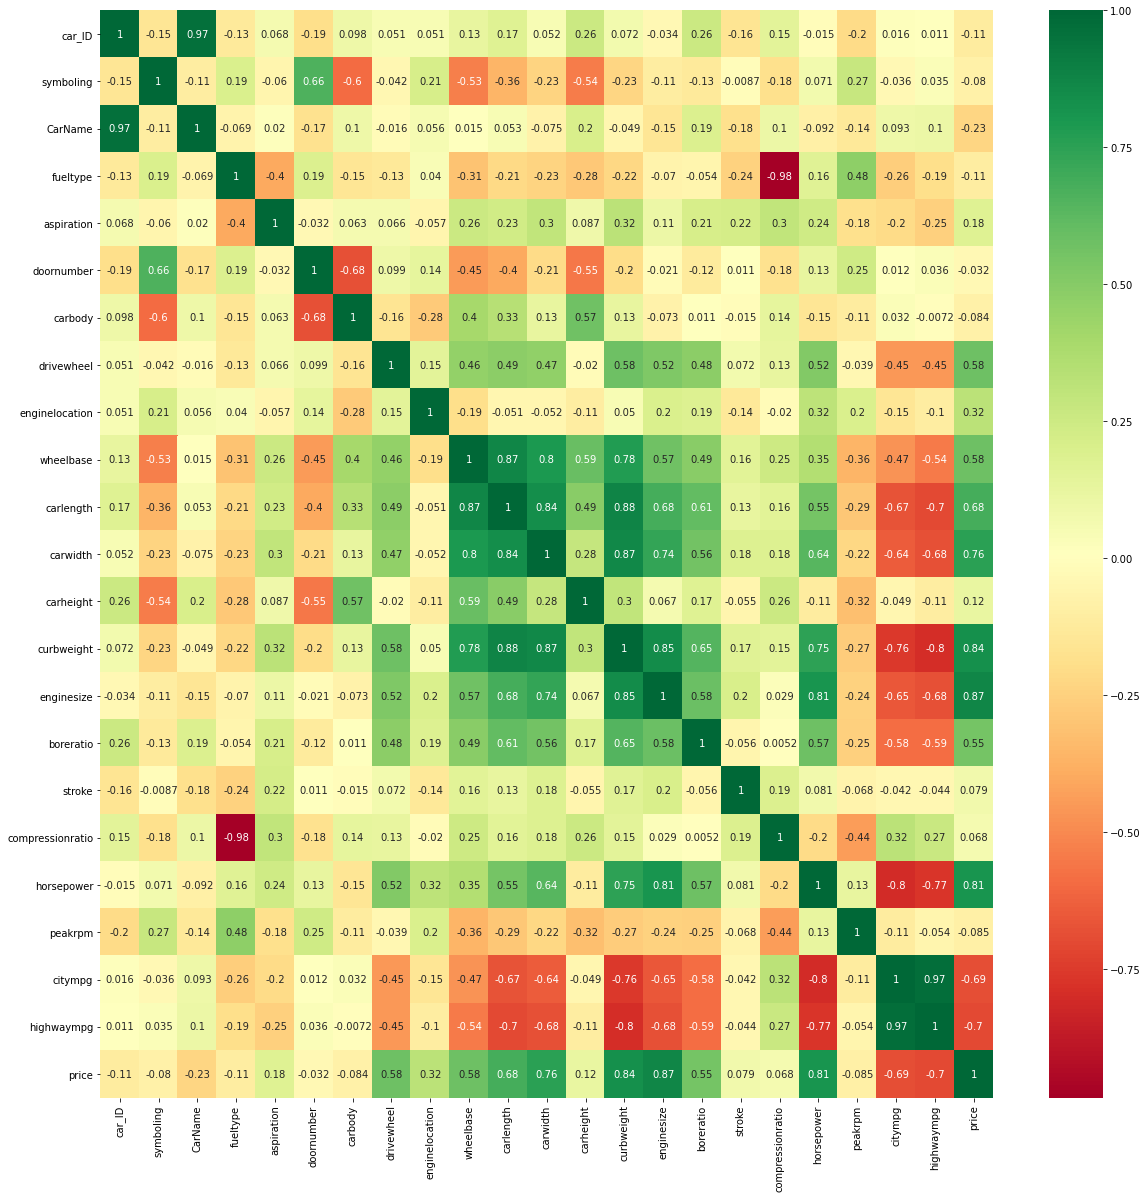

In [27]:
#Finding coorelation of each feature

import matplotlib.pyplot as plt
import seaborn as sns
corrmat= data.corr()

top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap='RdYlGn')


In [47]:
#Selecting only those features which are more coorelated with price(Value to be predicted):

data=data[['CarName','aspiration','drivewheel','enginelocation','wheelbase','carlength','carwidth','carheight','curbweight','horsepower','citympg', 'highwaympg','price']]

#Now each column is either float or integer.(No object or string value)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CarName         205 non-null    int32  
 1   aspiration      205 non-null    int32  
 2   drivewheel      205 non-null    int32  
 3   enginelocation  205 non-null    int64  
 4   wheelbase       205 non-null    float64
 5   carlength       205 non-null    float64
 6   carwidth        205 non-null    float64
 7   carheight       205 non-null    float64
 8   curbweight      205 non-null    int64  
 9   horsepower      205 non-null    int64  
 10  citympg         205 non-null    int64  
 11  highwaympg      205 non-null    int64  
 12  price           205 non-null    float64
dtypes: float64(5), int32(3), int64(5)
memory usage: 18.5 KB


In [48]:
#Spliting into data and labels

input_data=data.iloc[:,0:12]

output_labels=data.iloc[:,12:13]


In [59]:
#Spliting into training, testing and validation data

training_data=input_data[0:103]
training_labels=output_labels[0:103]

validation_data=input_data[103:144]
validation_labels=output_labels[103:144]

testing_data=input_data[144:]
testing_labels=output_labels[144:]


In [58]:
#Creating model, compile it and fit it train and validation data into it:

from tensorflow.keras import models
from tensorflow.keras import layers

#By hit and trial method I came to know tha for this model 4 layers having 10,8,6,1 neurons are best suitable 
model=models.Sequential()
model.add(layers.Dense(10,  activation='relu',  input_shape=(12,)))
model.add(layers.Dense(8,  activation='relu'))
model.add(layers.Dense(6,  activation='relu'))
model.add(layers.Dense(1,  activation='relu'))

#As it is regression problem loss funtion is 'mse' and matrics is 'mae' 
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

model.fit(training_data,
          training_labels,
          epochs=100,
          validation_data=(validation_data,validation_labels))

Epoch 1/100
4/4 [==============================] - 1s 54ms/step - loss: 305847392.0000 - mae: 14352.4182 - val_loss: 269146720.0000 - val_mae: 14525.9189
Epoch 2/100
4/4 [==============================] - 0s 17ms/step - loss: 273135712.0000 - mae: 13499.7254 - val_loss: 268022032.0000 - val_mae: 14488.9297
Epoch 3/100
4/4 [==============================] - 0s 10ms/step - loss: 244650457.6000 - mae: 13093.3680 - val_loss: 266840496.0000 - val_mae: 14449.9697
Epoch 4/100
4/4 [==============================] - 0s 11ms/step - loss: 271691923.2000 - mae: 13420.7646 - val_loss: 265953408.0000 - val_mae: 14420.6328
Epoch 5/100
4/4 [==============================] - 0s 12ms/step - loss: 277158041.6000 - mae: 13757.7027 - val_loss: 265051440.0000 - val_mae: 14390.7412
Epoch 6/100
4/4 [==============================] - 0s 12ms/step - loss: 270220400.0000 - mae: 13389.1701 - val_loss: 263942672.0000 - val_mae: 14353.9219
Epoch 7/100
4/4 [==============================] - 0s 11ms/step - loss: 2436

Epoch 54/100
4/4 [==============================] - 0s 11ms/step - loss: 176539321.6000 - mae: 10026.0369 - val_loss: 163793040.0000 - val_mae: 10517.5781
Epoch 55/100
4/4 [==============================] - 0s 12ms/step - loss: 192631705.6000 - mae: 10427.3842 - val_loss: 160823152.0000 - val_mae: 10382.7734
Epoch 56/100
4/4 [==============================] - 0s 12ms/step - loss: 157686998.4000 - mae: 9361.4537 - val_loss: 157317488.0000 - val_mae: 10221.4551
Epoch 57/100
4/4 [==============================] - 0s 11ms/step - loss: 187373737.6000 - mae: 10189.4115 - val_loss: 154549504.0000 - val_mae: 10092.2910
Epoch 58/100
4/4 [==============================] - 0s 11ms/step - loss: 185483212.8000 - mae: 10000.7555 - val_loss: 151613440.0000 - val_mae: 9953.5010
Epoch 59/100
4/4 [==============================] - 0s 11ms/step - loss: 163171644.8000 - mae: 9290.1777 - val_loss: 148181424.0000 - val_mae: 9788.8604
Epoch 60/100
4/4 [==============================] - 0s 11ms/step - loss: 1

In [60]:
#Checking mean absolute error through evaluation

test_mse_score, test_mae_score = model.evaluate(testing_data, testing_labels)

test_mae_score



2/2 [==============================] - 0s 2ms/step - loss: 10576896.0000 - mae: 2845.2561


2845.256103515625

In [66]:
#Predicting test data

prediction = model.predict(testing_data)

prediction

array([[12179.247 ],
       [12824.623 ],
       [11781.717 ],
       [12543.122 ],
       [12344.98  ],
       [13438.952 ],
       [10387.79  ],
       [10616.697 ],
       [10498.237 ],
       [11728.96  ],
       [11744.274 ],
       [15415.403 ],
       [10833.999 ],
       [10944.755 ],
       [11670.571 ],
       [11696.052 ],
       [10927.458 ],
       [10989.709 ],
       [11086.205 ],
       [11208.515 ],
       [11368.692 ],
       [11718.905 ],
       [11883.805 ],
       [12999.92  ],
       [12970.957 ],
       [13055.566 ],
       [13631.422 ],
       [13769.569 ],
       [14958.258 ],
       [12013.7705],
       [12657.16  ],
       [12403.224 ],
       [12398.884 ],
       [12608.502 ],
       [15071.417 ],
       [15251.267 ],
       [15784.254 ],
       [15874.372 ],
       [11668.362 ],
       [11466.203 ],
       [11688.118 ],
       [11490.679 ],
       [11763.891 ],
       [11973.432 ],
       [11908.083 ],
       [11650.413 ],
       [11500.103 ],
       [13546